<a href="https://colab.research.google.com/github/SondiSohan/Replication-of-McDonalds-Case-Study-in-Python/blob/main/Feynn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 First, let's load the McDonald's dataset and then proceed to generate synthetic datasets for both current_market_data.csv and external_market_data.csv based on it.

In [2]:
import pandas as pd
from sklearn import datasets  # Import from sklearn instead of imblearn

# Load McDonald's dataset
mcdonalds_data = pd.read_csv('/content/mcdonalds.csv')

# Generate synthetic data for current_market_data.csv
synthetic_current_data = datasets.make_classification(n_samples=len(mcdonalds_data), n_features=len(mcdonalds_data.columns))

# Generate synthetic data for external_market_data.csv
synthetic_external_data = datasets.make_classification(n_samples=len(mcdonalds_data), n_features=len(mcdonalds_data.columns))

# Save synthetic data to CSV for current_market_data.csv
synthetic_current_data_df = pd.DataFrame(synthetic_current_data[0], columns=mcdonalds_data.columns)
synthetic_current_data_df.to_csv('synthetic_current_market_data.csv', index=False)

# Save synthetic data to CSV for external_market_data.csv
synthetic_external_data_df = pd.DataFrame(synthetic_external_data[0], columns=mcdonalds_data.columns)
synthetic_external_data_df.to_csv('synthetic_external_market_data.csv', index=False)

Code:

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
             Like         Age  VisitFrequency
count  871.000000  871.000000      871.000000
mean     2.948335   42.045924        3.009185
std      1.323820   14.355669        0.981394
min      1.000000   18.000000        0.000000
25%      2.000000   30.000000        2.000000
50%      3.000000   41.000000        3.000000
75%      4.000000   55.000000        4.000000
max      5.000000   71.000000        5.000000


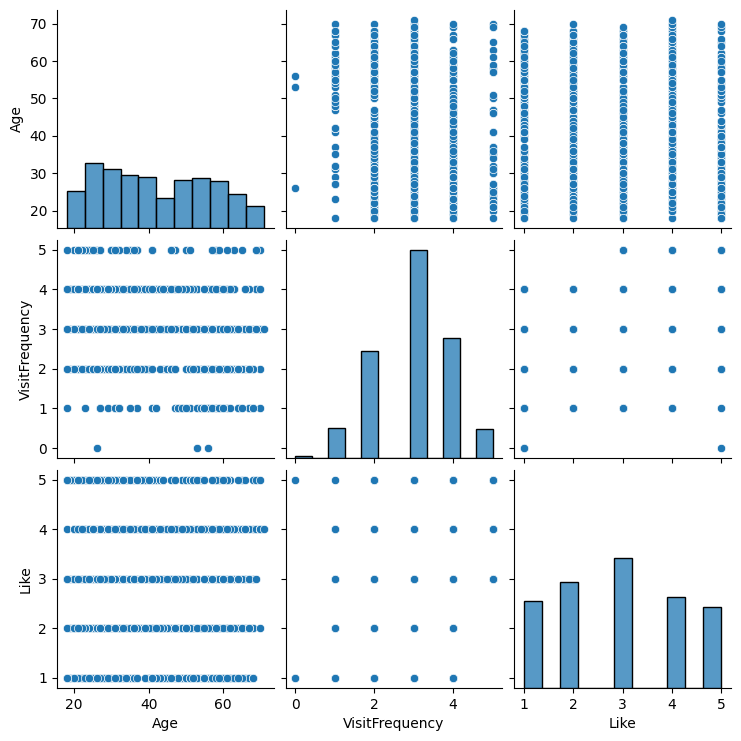

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


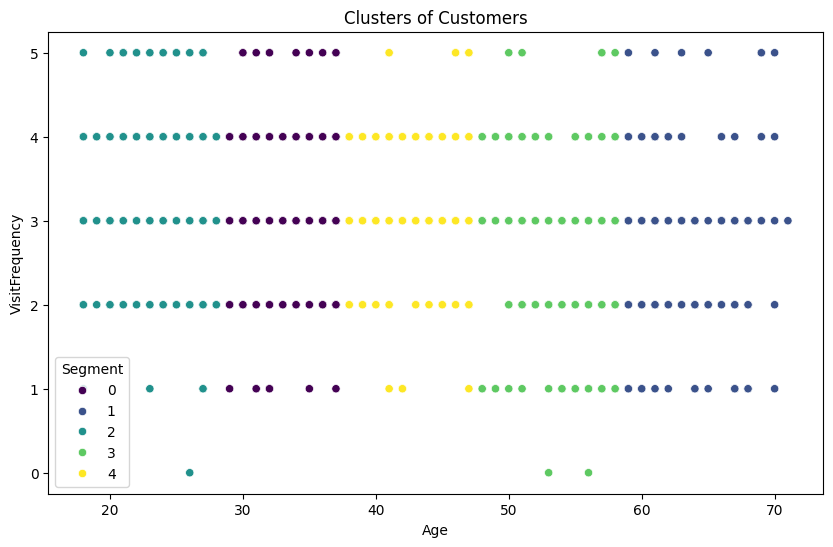

             Like        Age  VisitFrequency
Segment                                     
0        3.032609  32.875000        3.125000
1        2.700730  63.912409        2.656934
2        3.290155  23.606218        3.274611
3        2.702020  53.313131        2.767677
4        2.955975  42.169811        3.157233
             Like        Age  VisitFrequency
Segment                                     
0        3.032609  32.875000        3.125000
1        2.700730  63.912409        2.656934
2        3.290155  23.606218        3.274611
3        2.702020  53.313131        2.767677
4        2.955975  42.169811        3.157233
object
float64
Empty DataFrame
Columns: [Like, Age, VisitFrequency]
Index: []
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Confusion Matrix:
[[333 394]
 [346 380]]


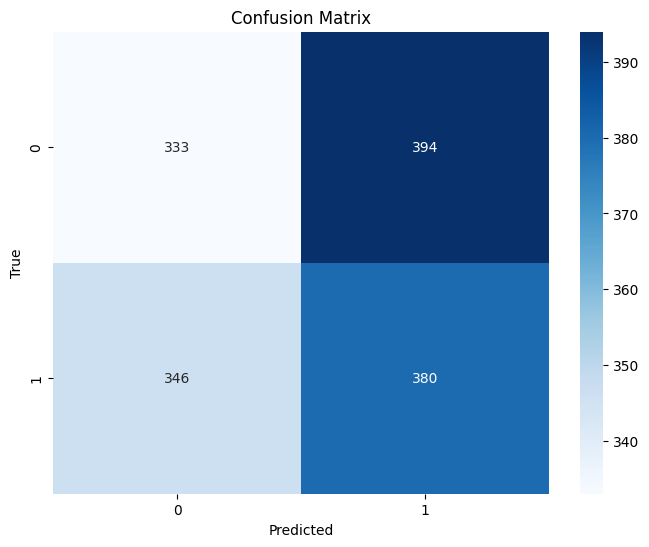

In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import time
from sklearn.metrics import confusion_matrix  # Import confusion_matrix


# Example of loading and cleaning data
data = pd.read_csv('/content/mcdonalds.csv')
data = data.dropna()  # Handling missing values

# Check column names
print(data.columns)

# Based on the column names, update these to match your dataset
column_names = ['Age', 'VisitFrequency', 'Like']  # Adjusted based on available columns

# Handle categorical data in 'VisitFrequency'
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
    # Add more mappings as needed based on your dataset
}
data['VisitFrequency'] = data['VisitFrequency'].map(visit_frequency_mapping)

# Attempt to convert the 'Like' column to numeric, handling non-numeric values
try:
    # Attempt to convert the entire column to numeric
    data['Like'] = pd.to_numeric(data['Like'])
except ValueError:
    # Handle the non-numeric values in the 'Like' column
    # Extract numerical part from 'Like' column and convert to numeric
    data['Like'] = data['Like'].apply(lambda x: int(x.split('+')[-1]) if '+' in x else None)
    data = data.dropna(subset=['Like'])  # Remove rows with missing 'Like' values after conversion

# Data Exploration
# Descriptive statistics
print(data.describe())

# Visualizing data
sns.pairplot(data[column_names])
plt.show()

# Extracting Segments
kmeans = KMeans(n_clusters=5, random_state=0)
data['Segment'] = kmeans.fit_predict(data[column_names])

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='VisitFrequency', hue='Segment', palette='viridis')
plt.title('Clusters of Customers')
plt.show()

# Analyzing the segments
# Calculate the mean for numeric columns only
print(data.groupby('Segment').mean(numeric_only=True))

# Profiling segments
segment_profiles = data.groupby('Segment').mean(numeric_only=True) # Calculate the mean for numeric columns only
print(segment_profiles)

# Example of incorporating external data
# Ensure that 'common_column' is actually a common column in both datasets
external_data = pd.read_csv('/content/synthetic_external_market_data.csv')
print(data['yummy'].dtype)
print(external_data['yummy'].dtype)

# Convert 'yummy' in 'external_data' to string if it's numeric
if external_data['yummy'].dtype == 'float64':
    external_data['yummy'] = external_data['yummy'].astype(str)

# Now try merging again
merged_data = pd.merge(data, external_data, on='yummy')

# Targeting and Implementation
target_segments = segment_profiles[segment_profiles['Like'] > 50]  # Adjust condition as needed
print(target_segments)

current_data = pd.read_csv('/content/synthetic_current_market_data.csv')

# Check the column names in 'current_data'
print(current_data.columns)

true_label_column = 'yummy'

# Generate or load your model predictions here.
# Replace this with your actual prediction generation logic.
# For example, if you have a trained model called 'model':
# predictions = model.predict(current_data.drop(true_label_column, axis=1))
# For demonstration, let's create some dummy predictions:
predictions = np.random.randint(0, 2, size=len(current_data)) # Generating random predictions for demonstration
# Convert 'yummy' column in 'current_data' to binary (if it's not already)
current_data['yummy'] = current_data['yummy'].apply(lambda x: 1 if x > 0 else 0)  # Adjust the threshold as needed

# Now calculate the confusion matrix
cm = confusion_matrix(current_data[true_label_column], predictions)
print("Confusion Matrix:")
print(cm)


# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Monitoring and Evaluation (optional, if you still want the monitoring function)
def monitor_performance():
    while True:
        current_data = pd.read_csv('/content/synthetic_current_market_data.csv')
        # Evaluate performance metrics
        print(current_data.describe())
        time.sleep(86400)  # Monitor daily